# Modelo Preditivo para detecção de fraudes

# 1. Importação e leitura dos dados.

In [1]:

# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#importando o pacote para separar os dados
from sklearn.model_selection import train_test_split

#importando os pacotes para mensurar qualidade e fit do modelo
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Caminho e leitura do dataset
caminho_dataset = "./dataset/creditcard.csv"
df = pd.read_csv(caminho_dataset)

# 2. EDA

### 2.1 Tamanho do dataframe
Abaixo temos a descrição do tamanho do dataset que iremos utilizar.
Podemos ver que o dataset possue quase 285k registros e temos mais de 30 atributos.

In [3]:
# Detalhes do dataset
print(f"Quantidade de registros: {df.shape[0]}")
print(f"Quantidade de atributos: {df.shape[1]}")

# Visualização de uma amostra dos dados
df.head()

Quantidade de registros: 284807
Quantidade de atributos: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Colunas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### 2.2 Tipo dos dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Formato dos valores de cada coluna do dataset
pd.DataFrame(df.dtypes, columns=['Tipo'])

,Tipo
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


### 2.3 Valores nulos

In [7]:
#Verificação de valores ausentes
pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Valores Vazios'])

,Valores Vazios
Time,0
V16,0
Amount,0
V28,0
V27,0
V26,0
V25,0
V24,0
V23,0
V22,0


### 2.4 Informações estatísticas básicas
Aqui temos algumas informações estatísticas básicas, tipo média, mediana, desvio padrão, quarts, etc. Essas informações nos ajudam a melhore entender a distribuição dos dados e a presença de outliers.

In [8]:
#Resumo estatístico do dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


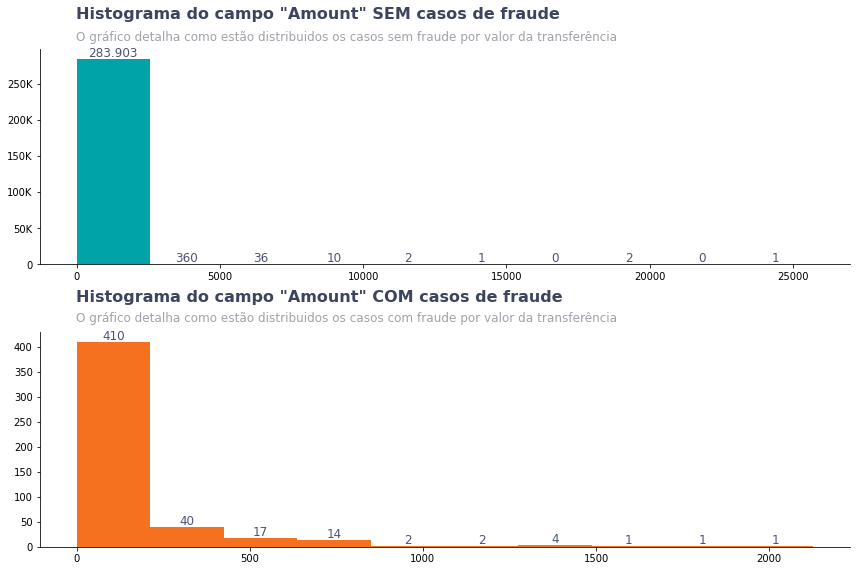

In [9]:
#Cores e rótulos do eixo y
wine = '#A8031F'
forest = '#00A820'
cyan = '#00DEF5'
orange = '#F5711F'
blue = '#00A4A8'
gray_title = '#3C445E'
gray_subtitle = '#A1A3AB'

#Histograma Amount
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 8))

#Configuração de aparência (Histograma SEM)
ax1.hist(df['Amount'][df['Class'] == 0] , bins=10, color=blue);

ax1.text(x=-5.5, y=340000, s='Histograma do campo "Amount" SEM casos de fraude', fontsize=16, fontweight='bold', 
        color=gray_title)
ax1.text(x=-5.5, y=310000, s='O gráfico detalha como estão distribuidos os casos sem fraude por valor da transferência', 
        fontsize=12, color=gray_subtitle)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_ylabel('')
ax1.set_yticklabels(['0', '50K', '100K', '150K', '200K', '250K'])

for i in ax1.patches:
  ax1.text(i.get_x() + i.get_width() / 2, i.get_height()+4000,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 12)

#Configuração de aparência (Histograma COM)
ax2.hist(df['Amount'][df['Class'] == 1] , bins=10, color=orange)

ax2.text(x=-0.8, y=490, s='Histograma do campo "Amount" COM casos de fraude', fontsize=16, fontweight='bold', 
        color=gray_title)
ax2.text(x=-0.8, y=450, s='O gráfico detalha como estão distribuidos os casos com fraude por valor da transferência', 
        fontsize=12, color=gray_subtitle)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_ylabel('')

for i in ax2.patches:
  ax2.text(i.get_x() + i.get_width() / 2, i.get_height()+5,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 12)

plt.tight_layout()

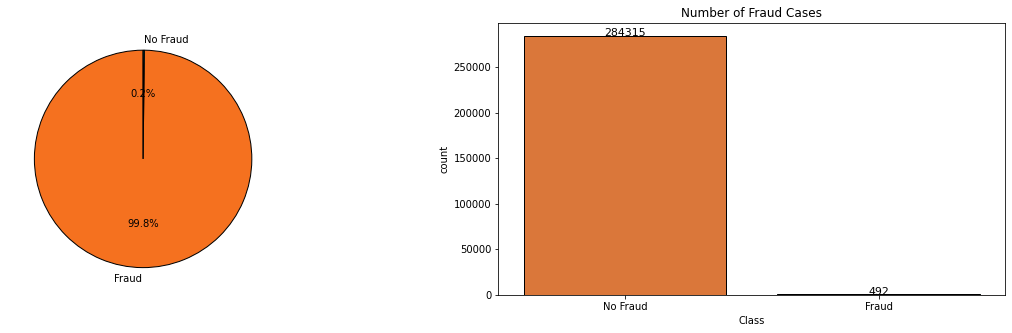

In [10]:
colors = ['#F5711F','#00A4A8']

fraud = len(df[df['Class'] == 1]) / len(df) * 100
nofraud = len(df[df['Class'] == 0]) / len(df) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot('Class',data = df,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

Percebemos que a maior parte dos registros não são de fraudes. Isso pode dificultar o treino do modelo, uma vez que existe um viés nos dados.

Para contornar esse ponto, deveremos fazer o balanceamento dos dados, bem como a padronização.

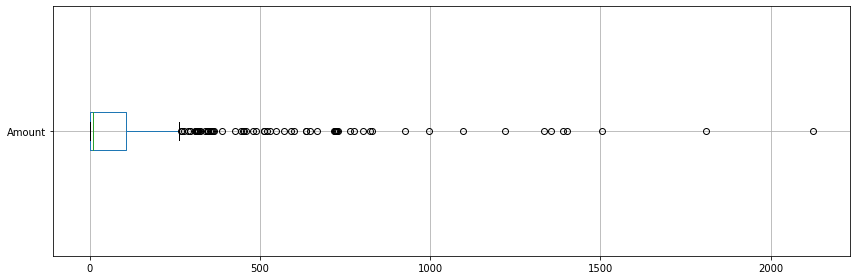

In [11]:
#Boxplot de amount
fig, ax = plt.subplots(figsize=(12, 4))

df.loc[df['Class'] == 1].boxplot(['Amount'], vert=False, ax=ax)

plt.tight_layout()

A partir do bloxplot acima, podemos analisar que existem outliers no campo `Amount`

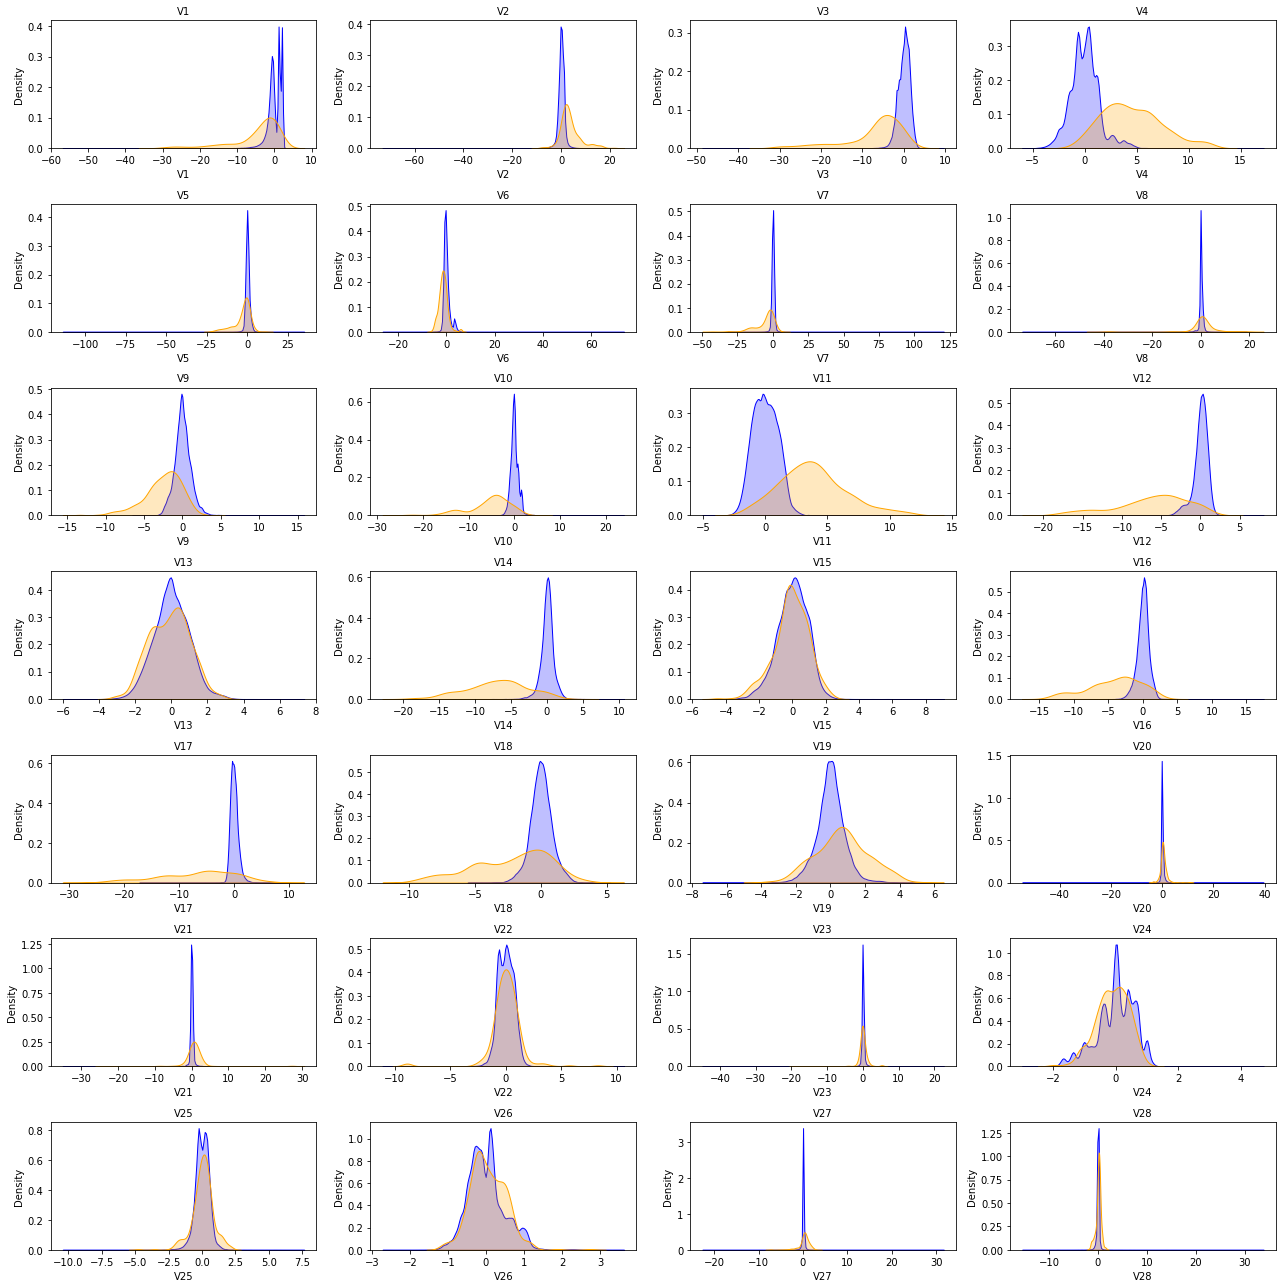

In [12]:
#Kernel Density Estimate de todos os atributos da base para identificar os atributos mais distintos

column_names = df.drop(['Class','Amount','Time'], axis=1).columns #remove as colunas que não são nomeadas
num_plots = len(column_names) #define a quantidade de gráficos
df_class_0 = df[df['Class'] == 0] #define os dados do gráfico 1
df_class_1 = df[df['Class'] == 1] #define os dados do gráfico 2

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18, 18)) #cria a figura e espaço para a plotagem dos 28 graficos
fig.subplots_adjust(hspace=1, wspace=1) #ajusta o espaço entre os 28 gráficos

idx = 0 #contador
for col in column_names:
  idx += 1 #
  plt.subplot(7, 4, idx) #Define o espaçp onde cada gráfico será plotado
  sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color="blue") #cria o gráfico de onda utilizando os dados de Vx da Classe 0
  sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color="orange") #cria o gráfico de onda utilizando os dados de Vx da Classe 1
  plt.title(col, fontsize=10) #
plt.tight_layout() 

Notamos que algumas variáveis possuem distribuições iguais do campo `Class`, quando este é igual a 0 (sem fraude) em comparação quando este é igual a 1 (com fraude).

# 3. Modelo Preditivo
Após a análise exploratória dos dados e verificado o formato dos dados, valores nulos e/ou outliers, daremos inicio ndas etapas para criar o modelo preditivo.
As proximas etapas são:
* Balancemaneto dos dados, caso seja necessário;
* Padronização dos dados, para garantir que todos os dados estejam na mesma escala, ou seja, que classes distintas, com valores distintos, sejam utilizados de forma equânime, ou seja, sem diferença de pesos;
* Definição dos hiperparâmetros;
* Dividir o dataset em grupos de treino e teste do modelo;
* Analisar o predict do modelo, e a taxa de acertividade;
* Analisar se todo o modelo foi bem desenvolvido.

### 3.1 Balanceamento e Padronização

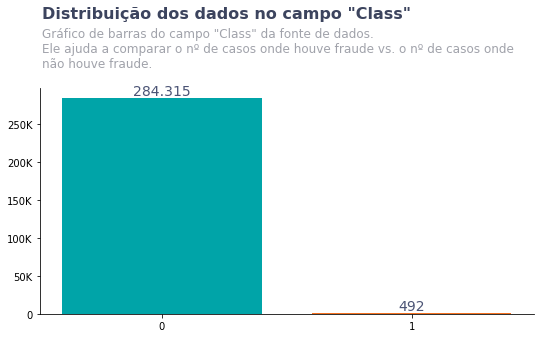

In [13]:
#balanceamento dos dados

case_1 = df['Class'][df['Class'] == 1].count() #qtd. de casos com fraude
case_0 = df['Class'][df['Class'] == 0].count() #qtd. de casos sem fraude

#gráfico de barras
orange = '#F5711F'
blue = '#00A4A8'

y = ['0', '50K', '100K', '150K', '200K', '250K']

fig, ax = plt.subplots(figsize=(8,5))

ax.bar('0', case_0, color = blue)
ax.bar('1', case_1, color = orange)

ax.text(x=-0.48, y=390000, s='Distribuição dos dados no campo "Class"', 
        fontsize=16, fontweight='bold', color=gray_title)
ax.text(x=-0.48, y=325000, s='Gráfico de barras do campo "Class" da fonte de dados.\nEle ajuda a comparar o nº de casos onde houve fraude vs. o nº de casos onde\nnão houve fraude.', 
        fontsize=12, color=gray_subtitle)

#mudança na aparência
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticklabels(y)

for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 4000,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 14)

plt.tight_layout()

O gráfico acima deixa muito claro que existe uma desbalanceamento na classe `Class`. 

Os casos de fraude representam apenas **0,2%** do total de dados da fonte utilizada. 

Para garantir que o modelo de machine learning tenha sucesso ao prever os casos de fraude, devemos antes de tudo balancear os dados.

Existem várias técnicas em ML com esse propósito, porém as principais são: **Oversampling** e **Undersampling**.

### 3.1.1 Undersampling
A técnica de undersampling busca equilibrar o conjunto de dados através do decréscimo de elementos do grupo com mais entradas de informação.

Tal procedimento envolve a remoção de elementos do conjunto maior ate que o grupo maior possua a mesma quantidade que o grupo menor.

### 3.1.2 Oversampling
A técnica de undersampling busca equilibrar o conjunto de dados através do acréscimo de elementos do grupo com mais entradas de informação.

Tal procedimento envolve a criação de novos elementos "sintéticos" (pois não entradas verdadeiramente presentas na fonde de dados) até que o grupo menor possua a mesma quantidade que o grupo maior.

Esta técnica deve ser muito bem avaliada antes do uso, pois, pode parecer vantajoso, mas esse tipo de ocorrência prejudica a capacidade preditiva de um modelo, pois o torna inflexível frente a um novo conjunto de dados.

In [14]:
#Normalizar Amount e Time

df_backup = df.copy() #backup para protegem os dataset em seu estado original

#Padronização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

### 3.2 Escolha do modelo
Usaremos uma regressão logística, modelo ideal para modelos de aprendizagem supervisionados, cujos resultados a serem previstos são no formato de classificação.

In [15]:
#Escolher do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression

### 3.3 Hyperparâmetros

In [16]:
#Definição dos Hyperparametros
model = LogisticRegression('l2')

### 3.4 Divisão do dataframe entre `treino` e `teste`

In [17]:
#Separaração do Dataframe em conjunto X e conjunto y
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1,1)

### 3.5 Balanceamento dos dados
#### 3.5.1 Neste exemplo, utilizados a técnica OVERSAMPLING

In [18]:
#Balanceamento do conjunto de dados

!pip install imblearn -q
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

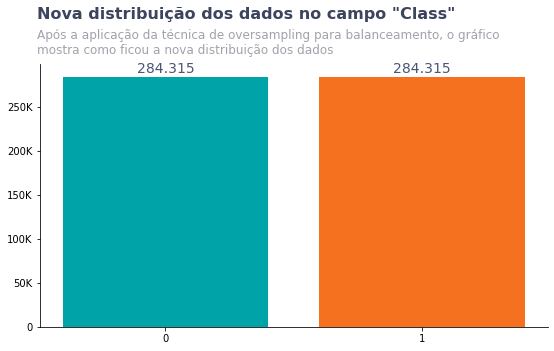

In [19]:
#B - Definição dos Hyperparametros
ros = RandomOverSampler(random_state=0)

#C - Separação dos dados e calculo do fit
X_resampled, y_resampled = ros.fit_resample(X, y)

#D - Plotagem do gráfico mostrando a nova distribuição

bcase_1 = np.count_nonzero(y_resampled == 1) #qtd. de casos com fraude
bcase_0 = np.count_nonzero(y_resampled == 0) #qtd. de casos sem fraude

y = ['0', '50K', '100K', '150K', '200K', '250K']

fig, ax = plt.subplots(figsize=(8,5))

ax.bar('0', bcase_0, color = blue)
ax.bar('1', bcase_1, color = orange)

ax.text(x=-0.5, y=350000, s='Nova distribuição dos dados no campo "Class"', 
        fontsize=16, fontweight='bold', color=gray_title)
ax.text(x=-0.5, y=310000, s='Após a aplicação da técnica de oversampling para balanceamento, o gráfico\nmostra como ficou a nova distribuição dos dados', 
        fontsize=12, color=gray_subtitle)

#mudança na aparência
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticklabels(y)

for i in ax.patches:
  ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 4000,
          '{:,}'.format(int(i.get_height())).replace(',','.'),
          ha = 'center', 
          color = '#4B5475', 
          fontsize = 14)

plt.tight_layout();

#### 3.5.2 **Separação dos dados em conjunto de treino e teste** 

In [20]:
#Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

#### 3.6 **Fit do modelo** 

Os dados de treino serão utilizados para "treinar" o modelo e calcular seu Fit, ou seja, tornar o modelo capaz de identificar padrões nos dados.

In [21]:
#Fit
model.fit(X_train, y_train)

LogisticRegression()

### 3.7 **Previsão do modelo** 

Os dados, após passados pelo processo de Fit, são utilizados para prever casos futuros.

In [22]:
#Predict
y_pred = model.predict(X_test)

A seguir serão aplicadas algumas técnicas para verificar a qualidade do modelo proposto. As técnicas escolhidas foram:

* **R²**: O R-quadrado estima a proporção dos valores da(s) variável(is) que são explicados/previstos pela(s) variável(is) independente(s) em um modelo preditivo. Quanto maior o valor, menor está a distância entre o previsto e o efetivo e, portanto, melhor o modelo. 

* **MAE (Mean Absolute Error)**: O Erro Médio Absoluto estima a diferença entre os valores estimados pelo modelo e os efetivamente ocorrrido em termos absolutos. Quanto menor o valor, menor está a distância entre o previsto e o efetivo e, portanto, melhor o modelo.  
* **MSE (Mean Squared Error)**: O Erro Quadrado Absoluto estima a diferença entre os valores estimados pelo modelo e os efetivamente ocorrrido, ambos elevados ao quadrado. Quanto menor o valor, menor está a distância entre o previsto e o efetivo e, portanto, melhor o modelo. 
* **Classification Report**:
  * **Precision**: Calcula a proporção dos valores corretamente previstos como "positivos" (previstos como sendo fraudes) em relação ao total de casos **previstos** como positivos, ou seja, considerando os Falsos Positivos (valores erroneamente classificados como fraudes)
  * **Recall**: Calcula a proporção dos valores corretamente previstos como "positivos" em relação ao total de casos que **efetivamente** fazem parte do total de casos positivos, ou seja, considerando os Falsos Negativos (valores que são fraudes, mas não foram identificados)
* **Confusion Matrix**: A Matriz de Confusão destaca a proporção dos valores separados em 4 grupos de valores:
  * TP (True Positives): % dos dados previstos como "positivo" (fraude) que realmente eram fraudes 
  * TN (True Negatives): % dos dados previstos como "negativos" (não fraude) que realmente eram não eram fraudes 
  * FP (False Positives): % dos dados erroneamente previstos como "positivo", pois não eram fraudes 
  * FN (False Negatives): % dos dados erroneamente previstos como "negativos", pois eram fraudes 

R² Score: 	0.80
MAE: 		0.05
MSE: 		0.05

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     70714
           1       0.98      0.92      0.95     71444

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158




Text(111.12, 0.5, 'Verdadeiro')

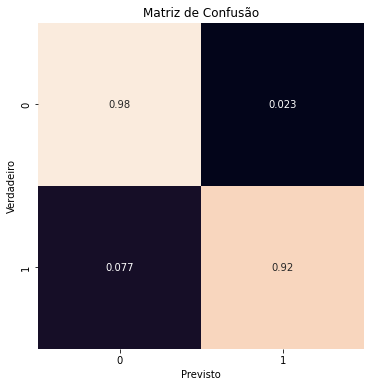

In [23]:
#Verificação da qualidade do modelo

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

Interessa analisar brevemente os resultados obtidos e o que eles significam para a qualidade do modelo preditivo utilizado.

* O R-quadrado de 0.8 indica uma boa capacidade das variáveis independentes de explicar/prever com sucesso a variável dependente (`Class`). Em geral, valores entre 0.8 e 0.9 são considerados muito bons. 
* Os baixos valores de MAE e MSE (ambos de .05) indicam que os valores previstos são bem próximos dos valores efetivos, reforçando a capacidade do modelo de prever resultados bem proximos dos dados de teste utilizados
* Os resultados de Precision e Recall também foram bastante positivos. 
  * Um resultados de 0.98 em Precision indica que foram poucas vezes que o modelo erroneamente previu casos de fraude. 
  * Já o resultado de 0.92 em Recall mostra que poucas vezes o modelo deixou de incluir um caso verdadeiro de Fraude.

No contexto deste projeto, Recall possui uma relevância maior do que Precision. Identificar um caso erroneamente como fraude pode causar certos atritos com clientes e gerar alguns custos a mais. Entretanto, deixar de identificar um caso como fraude pode resultar em danos muito mais sérios sobre receita, relação com clientes, imagem, etc. Portanto, um modelo que seja mais preciso em seu Recall em detrimento da penalização de Precision é bem mais favorável.

Por fim, ao observar a Matriz de Confusão, os valores representam a distribuição percentual dos dados em relação a previsão X real. %2,2 dos casos foram dados previstos como fraude cujos valores não foram de fraude. No outro extremo, 7,9% dos casos foram previstos como não fraude cujos valores foram de fraude. 

Importa destacar que como os valores utilizados para construção do nosso modelo foram criados a partir de uma técnica de balanceamento, a técnica escolhida possui considerável impacto no resultado obtido, seja positivo ou negativo. 

Apesar dos valores obtidos serem considerados bons, é interessante examinar se utilizando outros tipos de técnicas de Oversampling seria possível obter resultados mais ótimos para do modelo. Das diversas técnicas existentes, duas merecem destaque: SMOTE e ADASYN.

### SMOTE (Synthetic Minority Over Sampling Technique)

De maneira simplificada, a técnica SMOTE identifica os dados do conjunto minoritário de forma a estabelecer conexões entre cada um dos valores e seus vizinhos mais próximos (ou k-means) de maneira a criar um "espaço" para este grupo. A partir disto, novos valores são criados ao longo do intervalo de distância que existe entre os valores originais. 

Por um lado o procedimento é vantajoso, pois permite criar valores fidedignos, pois estão localizados em um espectro próximo ao de valores originais. Entretanto, esta técnica também pode ser desvantajosa, pois não considera os valores do grupo majoritátio em sua confecção. A figura abaixo representa como funciona o procedimento. 

Para um entendimento mais extenso desta técnica, recomendo o seguinte [artigo explicando a técnica](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) e o seguinte [video explicando a lógica e como executá-la em Python](https://www.youtube.com/watch?v=U3X98xZ4_no&t=392s).

<img src="https://iq.opengenus.org/content/images/2019/09/COVER-1.PNG">

In [24]:
#Importação da técnica SMOTE de oversampling
from imblearn.over_sampling import SMOTE

Todos os demais procedimentos abaixo seguem os mesmos princípios utilizados anteriormente. Alguns passos não foram repetidos, pois já foram executados anteriormente e estão citados como forma de facilitar o entendimento de como funcionaria o procedimento caso executado pela primeira vez.

### Logistic Regression

In [25]:
#1 - Escolha do Modelo (FEITO)

#2 - Hyperparametros (FEITO)

#3 - Separar
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1,1)

In [26]:
#B - Hyperparametros
sm = SMOTE(random_state=0) #Aplicação do método SMOTE em vez de Random Sampling

#C - Separar dados
X_resampled, y_resampled = sm.fit_resample(X, y) #Criação dos dados em Class

In [27]:
#3.1 - Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

#4 - Fit
model.fit(X_train, y_train)

#5 - Predict
y_pred = model.predict(X_test)

R² Score: 	0.79
MAE: 		0.05
MSE: 		0.05

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     71258
           1       0.97      0.92      0.95     70900

    accuracy                           0.95    142158
   macro avg       0.95      0.95      0.95    142158
weighted avg       0.95      0.95      0.95    142158




Text(111.12, 0.5, 'Verdadeiro')

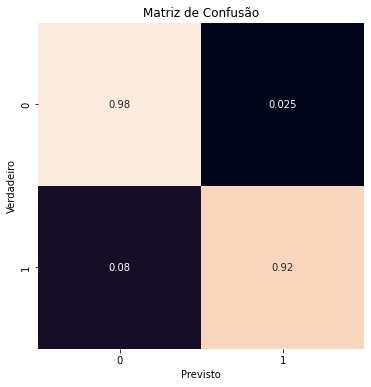

In [28]:
#Verificação da qualidade do modelo

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

### ADASYN (Adaptative Synthetic)

Similar ao SMOTE, esta técnica também busca criar novos valores para o grupo minoritário considerando a localização dos valores e o espaço de distância entre eles. Entretanto, esta técnica se diferencia da SMOTE em um aspecto chave. Os valores gerados pela técnica ADASYN ao utilizar a densidade de acumulo de valores como critério. Em outras palavras, a técnica gera mais valores onde existe uma baixa concentração de casos reais no espectro minoritário e cria menos valores onde existe uma alta concentração de casos reais. A imagem abaixo representa a diferença das técnicas SMOTE e ADASYN respectivamente.

<img src="https://www.researchgate.net/publication/348078650/figure/fig3/AS:975004695003136@1609470642047/Difference-between-ADASYN-and-SMOTE-algorithms.ppm">


In [29]:
#Importação da técnica ADASYN de oversampling
from imblearn.over_sampling import ADASYN

In [30]:
#1 - Escolha do Modelo (FEITO)

#2 - Hyperparametros (FEITO)

#3 - Separar
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1,1)

In [31]:
#B - Hyperparametros
ad = ADASYN(random_state=0)

#C - Separar dados
X_resampled, y_resampled = ad.fit_resample(X, y)

In [32]:
#3.1 - Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

#4 - Fit
model.fit(X_train, y_train)

#5 - Predict
y_pred = model.predict(X_test)

R² Score: 	0.54
MAE: 		0.11
MSE: 		0.11

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     70996
           1       0.90      0.87      0.88     71160

    accuracy                           0.89    142156
   macro avg       0.89      0.89      0.89    142156
weighted avg       0.89      0.89      0.89    142156




Text(111.12, 0.5, 'Verdadeiro')

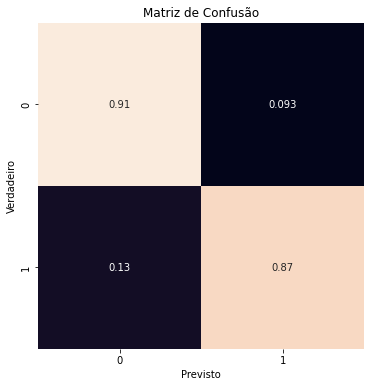

In [33]:
#Verificar o sucesso do modelo

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

### Decision Tree

A Árvore de Decisão é outra clássica metodologia de aprendizado supervisionado para modelos de classificação. Ela utiliza uma lógica de "se...então", por exemplo, se o valor em `Amount` no nosso conjunto de dados for maior que X, então o modelo determina que pode ser mais provável que seja sim um caso de fraude. 

De forma sucessiva o modelo analisa cada um dos atributos (colunas) no conjunto de dados e determina quais deles são capazes de distinguir com mais capacidade os casos de fraude dos casos que não são fraude. A partir disso "ramos" são formados onde, de um lado, temos teóricamente 2 conjuntos: um com dados só de fraude e outro com casos só de não fraude. Entretanto, isto não ocorre na maioria das vezes, pois ocorrem casos de Falsos Positivos e Falsos Negativos em ambos os grupos.

Em seguida, um novo diferente em cada um dos ramos é utilizado para separar novamente os dados em 2 ramos, cada vez mais tentando alcançar a separação com maior pureza possível, ou seja, grupos puramente de fraude e sem fraude. A imagem abaixo representa de forma bem simplificada a lógica desta metodologia.

<img src="https://miro.medium.com/max/2584/0*PB7MYQfzyaLaTp1n">

In [34]:
#1 - Escolher modelo
from sklearn.tree import DecisionTreeClassifier

#2 - Hyperparametros
model_b1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model_b2 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model_b3 = DecisionTreeClassifier(max_depth=8, criterion='entropy')
model_b4 = DecisionTreeClassifier(max_depth=16, criterion='entropy')

In [35]:
#3 - Separar
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1,1)

#3.1 - Balanceamento dos dados

#3.1.1 - Hyperparametros
ros = RandomOverSampler(random_state=0)

#3.1.2 - Separar dados
X_resampled, y_resampled = ros.fit_resample(X, y)

#3.2 - Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

#4 - Fit
model_b1.fit(X_resampled, y_resampled)
model_b2.fit(X_resampled, y_resampled)
model_b3.fit(X_resampled, y_resampled)
model_b4.fit(X_resampled, y_resampled)

#5 - Predict
y_pred_b1 = model_b1.predict(X_test)
y_pred_b2 = model_b2.predict(X_test)
y_pred_b3 = model_b3.predict(X_test)
y_pred_b4 = model_b4.predict(X_test)

R² Score: 	0.66
MAE: 		0.08
MSE: 		0.08

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     71207
           1       0.91      0.92      0.92     70951

    accuracy                           0.92    142158
   macro avg       0.92      0.92      0.92    142158
weighted avg       0.92      0.92      0.92    142158




Text(111.12, 0.5, 'Verdadeiro')

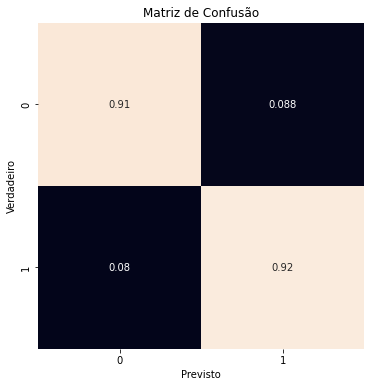

In [36]:
#Verificar sucesso do modelo b1

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b1)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b1)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b1))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b1)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b1)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.76
MAE: 		0.06
MSE: 		0.06

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     71207
           1       0.99      0.89      0.94     70951

    accuracy                           0.94    142158
   macro avg       0.95      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158




Text(111.12, 0.5, 'Verdadeiro')

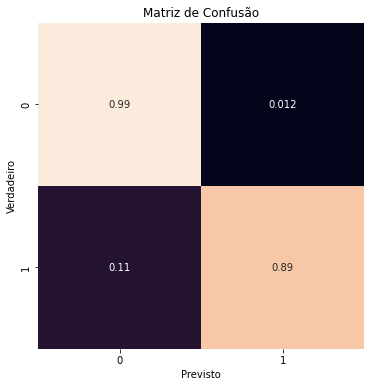

In [37]:
#Verificar sucesso do modelo b2

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b2)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b2)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b2))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b2)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.93
MAE: 		0.02
MSE: 		0.02

Classification Report
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     71207
           1       0.97      0.99      0.98     70951

    accuracy                           0.98    142158
   macro avg       0.98      0.98      0.98    142158
weighted avg       0.98      0.98      0.98    142158




Text(111.12, 0.5, 'Verdadeiro')

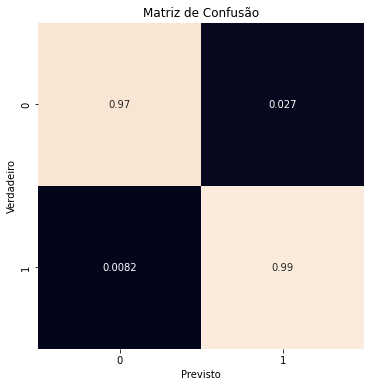

In [38]:
#Verificar sucesso do modelo b3

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b3)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b3)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b3))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b3)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b3)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	1.00
MAE: 		0.00
MSE: 		0.00

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71207
           1       1.00      1.00      1.00     70951

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




Text(111.12, 0.5, 'Verdadeiro')

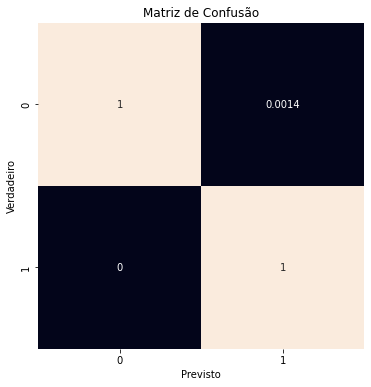

In [39]:
#Verificar sucesso do modelo b4

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b4)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b4)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b4))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b4)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b4)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

Ao analisar os 4 modelos é possível identificar certos comportamentos nos resultados de qualidade obtidos. 

Primeiramente o R², MAE e MSE foram melhorando conforme mais ramos foram adicionados à árvore. Inicialmente, o modelo com 2 ramos apresentou baixo R² (0.66) e MAE (0.09) e MSE (0.09) levemente altos. 

Em seguida, os valores de Precision e Recall também foram melhorando. O primeiro modelo já apresentou bons resultados, de maneira que foram bem semelhantes com os resultados do modelo de regressão logística utilizado anteriormente (Precision = 0.91; Recall = 0.91).

Por fim, ao analisar os Falsos Positivos e Falsos Negativo, houve significativa melhora. Os modelos de b1 (2 ramos) e b2 (4 ramos) se comportaram similar aos casos no modelo de regressão logística com FN em torno de 0.08 e 0.11 e FP em torno de 0.01 e 0.09. 

Vale destacar os resultados bem mais favoráveis no modelo b3 (8 ramos). Nele, os Falsos Negativos (0.0086) e Falsos Positivos reduziram drásticamente (0.027). Como já mencionado anteriormente, é altamente relevante para o caso em questão reduzir o total de Falsos Negativos de maneira a evitar o máximo que casos de fraude passem pelo filtro do modelo.

Uma última observação diz respeito ao modelo b4 (16 ramos). Seus resultados foram perfeitos em todas as categorias de qualidade. Isto é um forte indicativo de overfitting do modelo, ou seja, ele é capaz de segmentar perfeitamente os grupos fraude e não fraude do conjunto de dados utilizado oferecido. Caso novos dados fossem utilizados, este modelo não seria capaz de prevê-los com sucesso. 

Este resultado também pode servir de fundamento para questionar o modelo b3. É possível que ele também esteja sofrendo com problemas de overfitting, apesar de existirem certa margem de erro em todos os resultados.

Como próximo passo, similar ao modelo de Regressão Logística, a utilização das técnicas de SMOTE e ADASYN para oversampling foram aplicadas e novos modelos gerados com o intuito de identificar melhoras nos resultados.

### Decision Tree - SMOTE (Synthetic Minority Over Sampling Technique)

In [40]:
#B - Hyperparametros
sm = SMOTE(random_state=0) #Aplicação do método SMOTE em vez de Random Sampling

#C - Separar dados
X_resampled, y_resampled = sm.fit_resample(X, y) #Criação dos dados em Class

In [41]:
#4 - Fit
model_b1.fit(X_resampled, y_resampled)
model_b2.fit(X_resampled, y_resampled)
model_b3.fit(X_resampled, y_resampled)
model_b4.fit(X_resampled, y_resampled)

#5 - Predict
y_pred_b1 = model_b1.predict(X_test)
y_pred_b2 = model_b2.predict(X_test)
y_pred_b3 = model_b3.predict(X_test)
y_pred_b4 = model_b4.predict(X_test)

R² Score: 	0.66
MAE: 		0.09
MSE: 		0.09

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     71207
           1       0.99      0.84      0.91     70951

    accuracy                           0.91    142158
   macro avg       0.92      0.91      0.91    142158
weighted avg       0.92      0.91      0.91    142158




Text(111.12, 0.5, 'Verdadeiro')

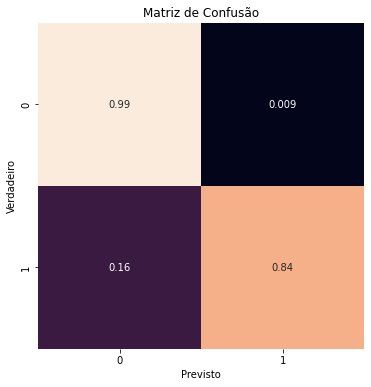

In [42]:
#Verificar sucesso do modelo b1

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b1)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b1)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b1))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b1)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b1)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.75
MAE: 		0.06
MSE: 		0.06

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     71207
           1       0.98      0.89      0.94     70951

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158




Text(111.12, 0.5, 'Verdadeiro')

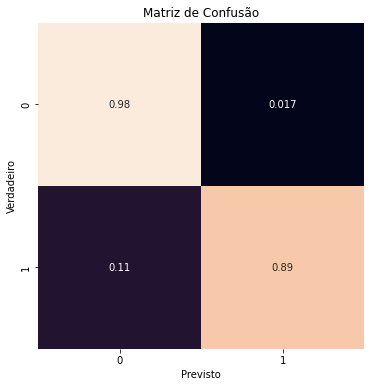

In [43]:
#Verificar sucesso do modelo b2

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b2)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b2)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b2))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b2)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.87
MAE: 		0.03
MSE: 		0.03

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     71207
           1       0.97      0.97      0.97     70951

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158




Text(111.12, 0.5, 'Verdadeiro')

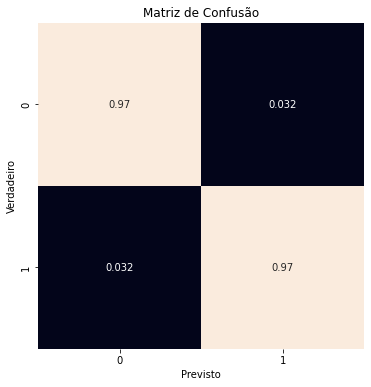

In [44]:
#Verificar sucesso do modelo b3

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b3)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b3)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b3))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b3)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b3)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.99
MAE: 		0.00
MSE: 		0.00

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71207
           1       1.00      1.00      1.00     70951

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




Text(111.12, 0.5, 'Verdadeiro')

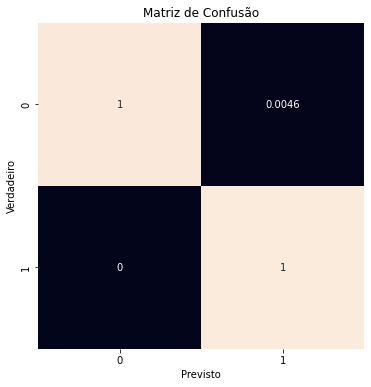

In [45]:
#Verificar sucesso do modelo b4

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b4)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b4)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b4))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b4)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b4)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

### Decision Tree - ADASYN (Adaptative Synthetic)

In [46]:
#B - Hyperparametros
ad = ADASYN(random_state=0)

#C - Separar dados
X_resampled, y_resampled = ad.fit_resample(X, y)

In [47]:
#4 - Fit
model_b1.fit(X_resampled, y_resampled)
model_b2.fit(X_resampled, y_resampled)
model_b3.fit(X_resampled, y_resampled)
model_b4.fit(X_resampled, y_resampled)

#5 - Predict
y_pred_b1 = model_b1.predict(X_test)
y_pred_b2 = model_b2.predict(X_test)
y_pred_b3 = model_b3.predict(X_test)
y_pred_b4 = model_b4.predict(X_test)

R² Score: 	0.39
MAE: 		0.15
MSE: 		0.15

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.73      0.83     71207
           1       0.78      0.96      0.86     70951

    accuracy                           0.85    142158
   macro avg       0.87      0.85      0.85    142158
weighted avg       0.87      0.85      0.85    142158




Text(111.12, 0.5, 'Verdadeiro')

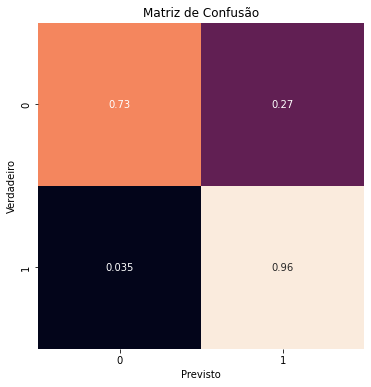

In [48]:
#Verificar o sucesso do modelo b1

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b1)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b1)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b1))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b1)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b1)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.64
MAE: 		0.09
MSE: 		0.09

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     71207
           1       0.87      0.96      0.91     70951

    accuracy                           0.91    142158
   macro avg       0.91      0.91      0.91    142158
weighted avg       0.91      0.91      0.91    142158




Text(111.12, 0.5, 'Verdadeiro')

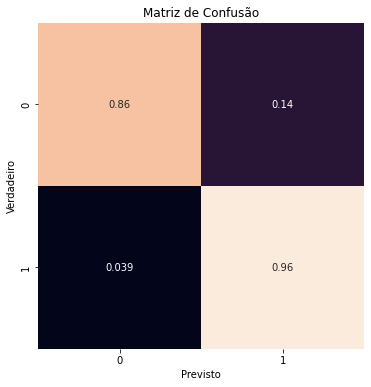

In [49]:
#Verificar o sucesso do modelo b2

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b2)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b2)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b2))) #MSE
#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b2)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.82
MAE: 		0.04
MSE: 		0.04

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     71207
           1       0.94      0.98      0.96     70951

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158




Text(111.12, 0.5, 'Verdadeiro')

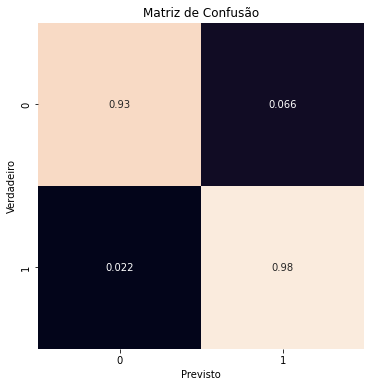

In [50]:
#Verificar o sucesso do modelo b3

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b3)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b3)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b3))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b3)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b3)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

R² Score: 	0.99
MAE: 		0.00
MSE: 		0.00

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71207
           1       0.99      1.00      1.00     70951

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




Text(111.12, 0.5, 'Verdadeiro')

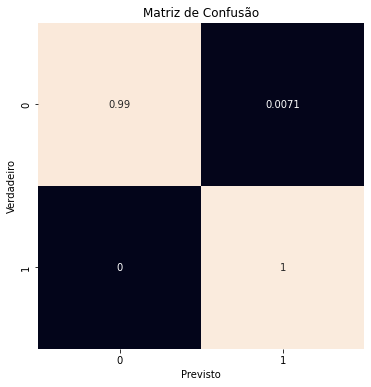

In [51]:
#Verificar o sucesso do modelo b4

print("R² Score: \t{:.2f}".format(r2_score(y_test, y_pred_b4)))          #R²
print("MAE: \t\t{:.2f}".format(mean_absolute_error(y_test, y_pred_b4)))  #MAE
print("MSE: \t\t{:.2f}\n".format(mean_squared_error(y_test, y_pred_b4))) #MSE

#Classification Report
print(f"Classification Report\n {classification_report(y_test, y_pred_b4)}\n")

#Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_b4)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #???

sns.heatmap(cmn, annot=True, cbar=False, 
            square=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

# 4. Conclusão

Após a aplicação de 2 métodos de ML, regressão logística e árvore de decisão, criamos um modelo de identificação de fraudes de cartão de crédito, com uma alta acertividade. 

Neste projeto, o segundo método apresentou melhores resultados, apesar da diferença ser bem leve entre ambos os métodos. Vale reforçar que não existe superioridade geral entre metodologias, assim caso o problema a ser resolvido fosse diferente, possivelmente a regressão logística seria um método com resultados mais ótimos. 

Vale reforçar também a utilização de 3 técnicas diferentes de balanceamento de dados devido a pouca quantidade de casos de fraude comparados aos casos de não fraude. Cada técnica utiliza lógicas matemáticas diferentes para gerar novos valores e, novamente, não existe uma solução mais ideal. No presente projeto todos os resultados foram bem próximos uns dos outros. Deve-se destacar que a técnica de Undersampling não foi aplicada neste projeto. Esta foi uma escolha pessoal, pois a perda de informação com a redução de dados seria bem extrema, possivelmente reduzindo o poder explicativo do modelo. 

Destaca-se também que um dos principais critérios de desempate utilizados neste projeto foi a proporção de Falsos Negativos. No problema em mãos de fraude de cartão, deixar de identificar um caso como fraude é muito pior do que erroneamento identificar um caso como fraude, pois a diferença sobre o impacto financeiro é muito maior. O problema de negócios deve ser o centro de qualquer solução de Machine Learning, portanto, seja qual for o projeto construído, ele deve ter no escopo os ganhos e perdas que geram para o negócio.